In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 12)

In [78]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
%store -r df_new

In [4]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# Filter out the quantity that equals or less than zero

df_new = df_new[df_new['UnitPrice'] > 0]

In [6]:
df_new.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,530104.00,530104.00,397884.00
mean,10.54,3.91,15294.42
std,155.52,35.92,1713.14
min,1.00,0.00,12346.00
25%,1.00,1.25,13969.00
50%,3.00,2.08,15159.00
75%,10.00,4.13,16795.00
max,80995.00,13541.33,18287.00


## Customer Insight
1. Who are loyal customer?
2. Which customer have ordered most frequently?
3. Which customer contribute the most to my revenue?

### Loyal Customers

In [7]:
df_new['amount'] = df_new['UnitPrice'] * df_new['Quantity']
df_new.head()

/var/folders/93/2fmdks4d0vx3h40by9f3474w0000gn/T/ipykernel_56637/3631463619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['amount'] = df_new['UnitPrice'] * df_new['Quantity']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [8]:
orders = df_new.groupby(['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count().rename(columns={'InvoiceNo': 'orders'}).sort_values(by='orders', ascending=False)

In [9]:
orders

,CustomerID,Country,orders
4018,17841.0,United Kingdom,7847
1887,14911.0,EIRE,5675
1297,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4595
1669,14606.0,United Kingdom,2700
...,...,...,...
4270,18184.0,United Kingdom,1
2752,16093.0,United Kingdom,1
2742,16078.0,United Kingdom,1
2740,16073.0,United Kingdom,1


In [10]:
# set color default on seaborn

sns.set_palette('Set2')
plt.style.use('bmh')

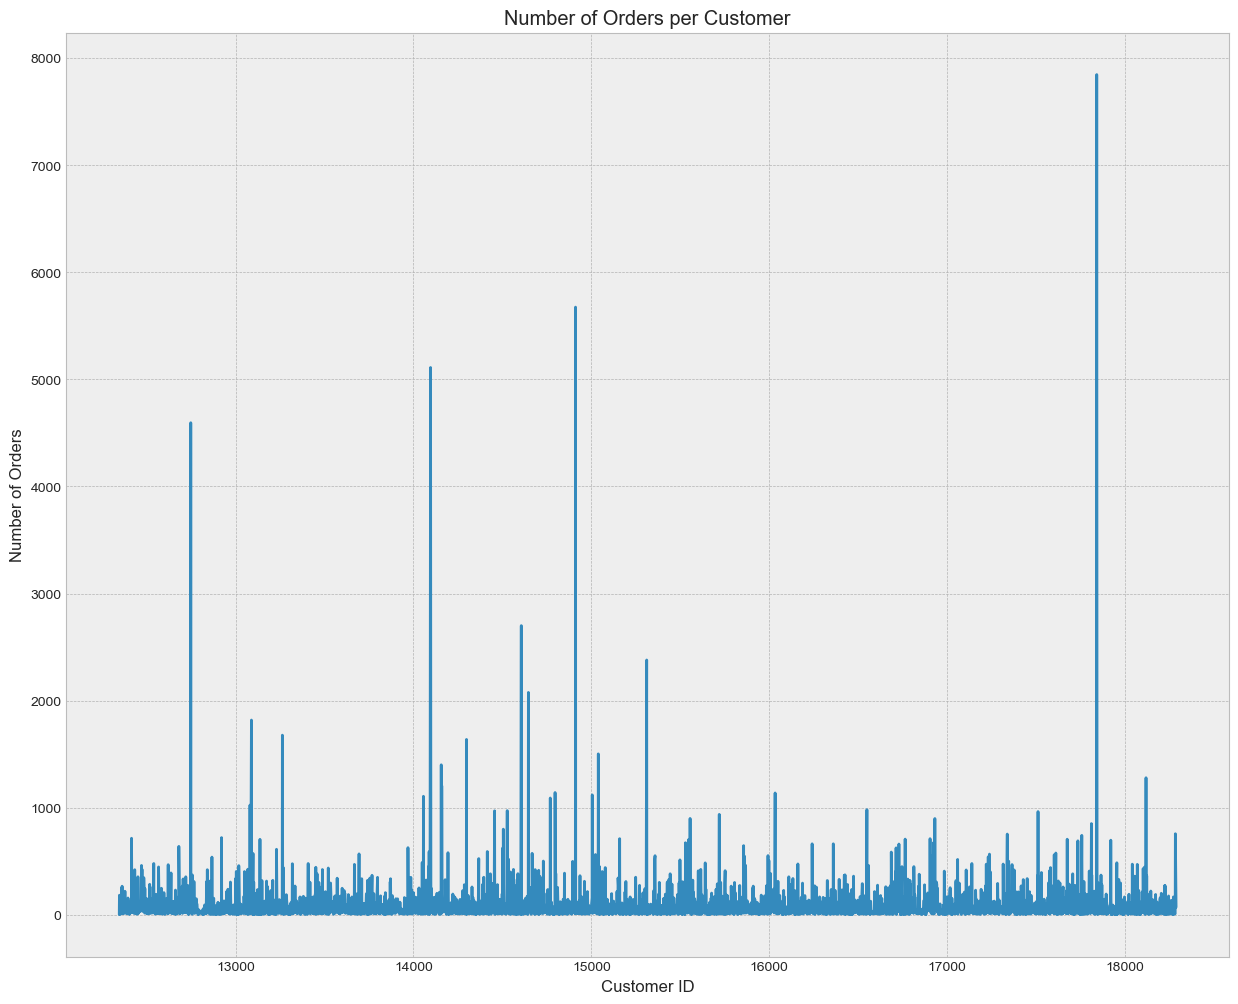

In [11]:
sns.lineplot(x='CustomerID', y='orders', data=orders)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Customer')
plt.show()

In [12]:
spending = df_new.groupby(['CustomerID', 'Country'], as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)
spending.head()

,CustomerID,Country,amount
1697,14646.0,Netherlands,280206.02
4209,18102.0,United Kingdom,259657.30
3736,17450.0,United Kingdom,194550.79
3016,16446.0,United Kingdom,168472.50
1887,14911.0,EIRE,143825.06


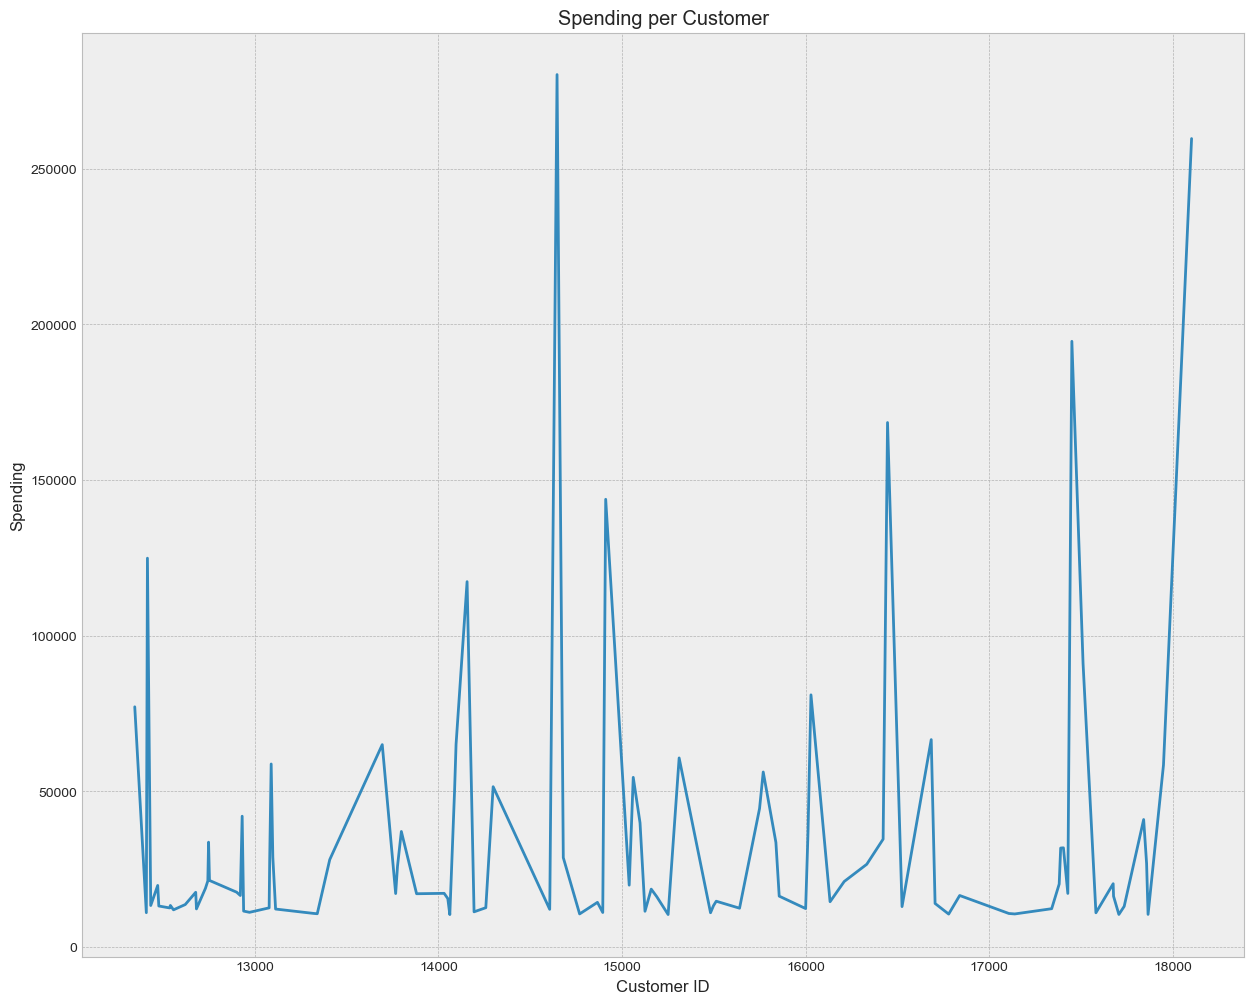

In [13]:
# Spending 100 top customer visualization

sns.lineplot(x='CustomerID', y='amount', data=spending.sort_values(by = 'amount', ascending=False)[:100])
plt.xlabel('Customer ID')
plt.ylabel('Spending')
plt.title('Spending per Customer')
plt.show()

## Pattern Based on DateTime
1. In which month is the highest number orders placed?
2. On which day of the week is the highest number of orders placed?
3. At what time of the day is the store busiest?

In [14]:
import datetime as dt

In [15]:
df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'])
df_new

/var/folders/93/2fmdks4d0vx3h40by9f3474w0000gn/T/ipykernel_56637/520931457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [16]:
df_new.insert(loc=2, column='year_month', value=df_new['InvoiceDate'].dt.to_period('M'))

In [17]:
df_new.insert(loc=3, column='month', value=df_new['InvoiceDate'].dt.month)
df_new.insert(loc=4, column='day', value=df_new['InvoiceDate'].dt.dayofweek)

In [18]:
df_new.day.unique()

array([2, 3, 4, 6, 0, 1])

In [19]:
# ignore warning

import warnings
warnings.filterwarnings('ignore')

In [20]:
df_new['day'] = df_new['InvoiceDate'].dt.day_name()

In [21]:
df_new.insert(loc=5, column='hour', value=df_new['InvoiceDate'].dt.hour)
df_new.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,2010-12,12,Wednesday,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,2010-12,12,Wednesday,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,2010-12,12,Wednesday,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,2010-12,12,Wednesday,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,2010-12,12,Wednesday,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
df_new.tail()

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
541904,581587,22613,2011-12,12,Friday,12,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,2011-12,12,Friday,12,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,2011-12,12,Friday,12,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,2011-12,12,Friday,12,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541908,581587,22138,2011-12,12,Friday,12,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


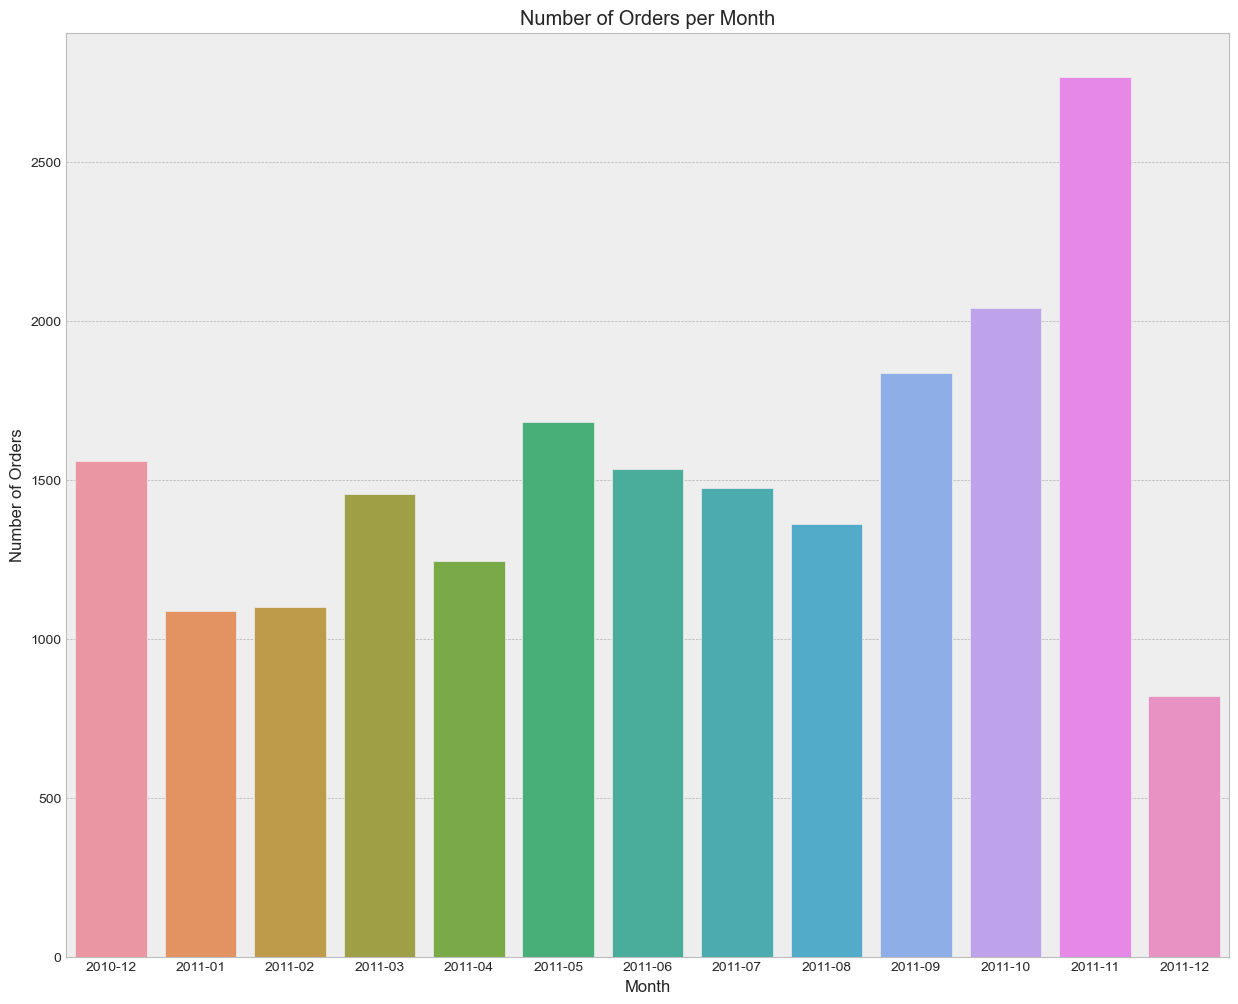

In [23]:
# Viz number of order per month

sns.barplot(x='year_month', y='orders', data=df_new.groupby('year_month')['InvoiceNo'].nunique().reset_index().rename(columns={'InvoiceNo': 'orders'}))
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month')
plt.show()

In [24]:
sns.set_palette('Blues')

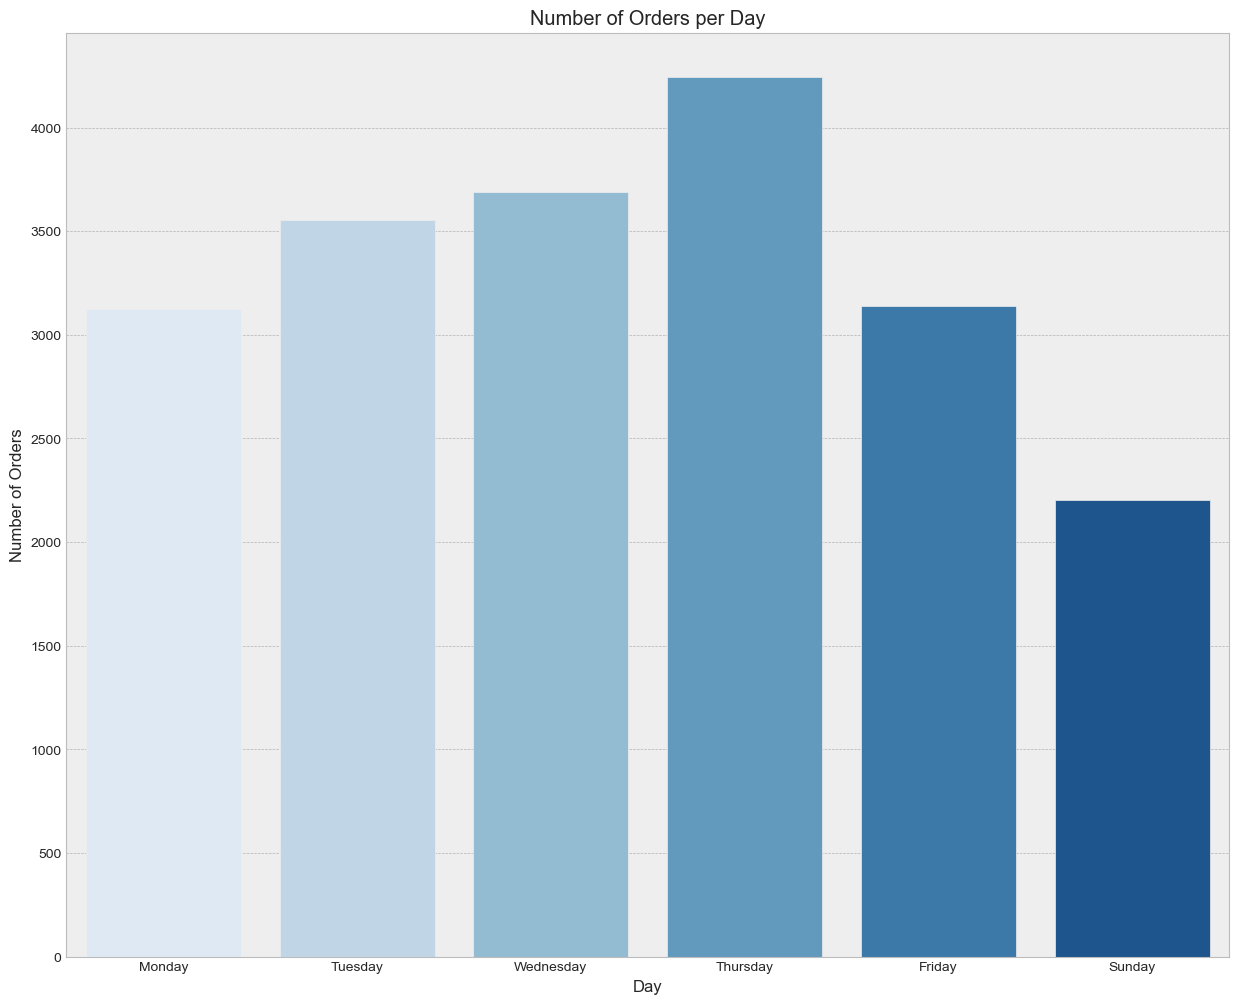

In [25]:
# Group data by day and sort it from monday to sunday
#sns.color_palette('Blues_d')
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter, range(len(sorter))))
sns.barplot(x='day', y='orders', data=df_new.groupby('day')['InvoiceNo'].nunique().reset_index().rename(columns={'InvoiceNo': 'orders'}).sort_values('day', key=lambda x: x.map(sorterIndex)))
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Day')
plt.show()


In [26]:
sns.set_palette("Spectral")

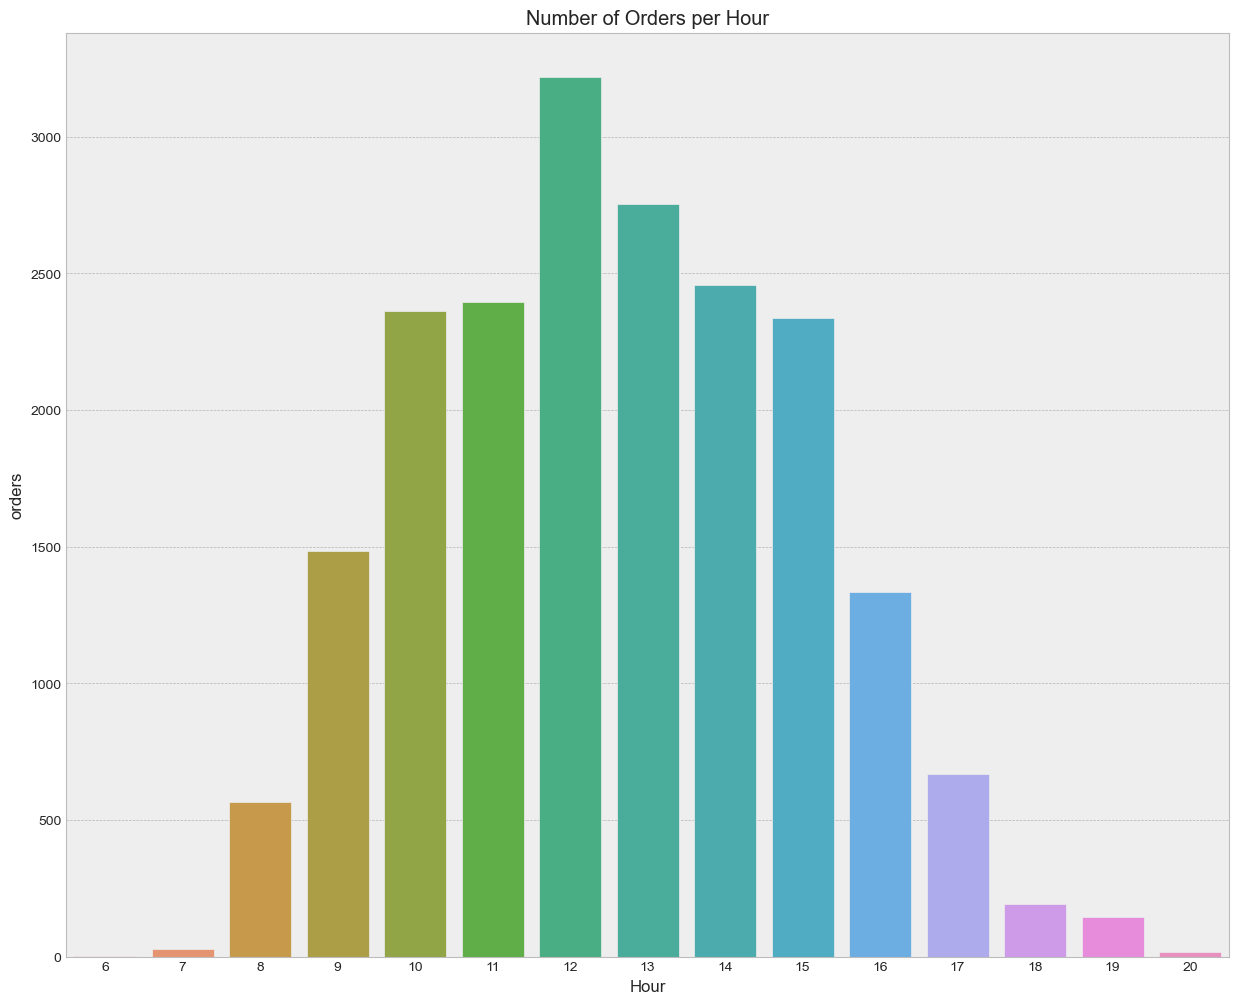

In [27]:
sns.barplot(x='hour', y='orders', data=df_new.groupby('hour')['InvoiceNo'].nunique().reset_index().rename(columns={'InvoiceNo': 'orders'}))
plt.xlabel('Hour')
plt.ylabel('orders')
plt.title('Number of Orders per Hour')
plt.show()

In [28]:
df_new.UnitPrice.describe()

count    530104.000000
mean          3.907625
std          35.915681
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

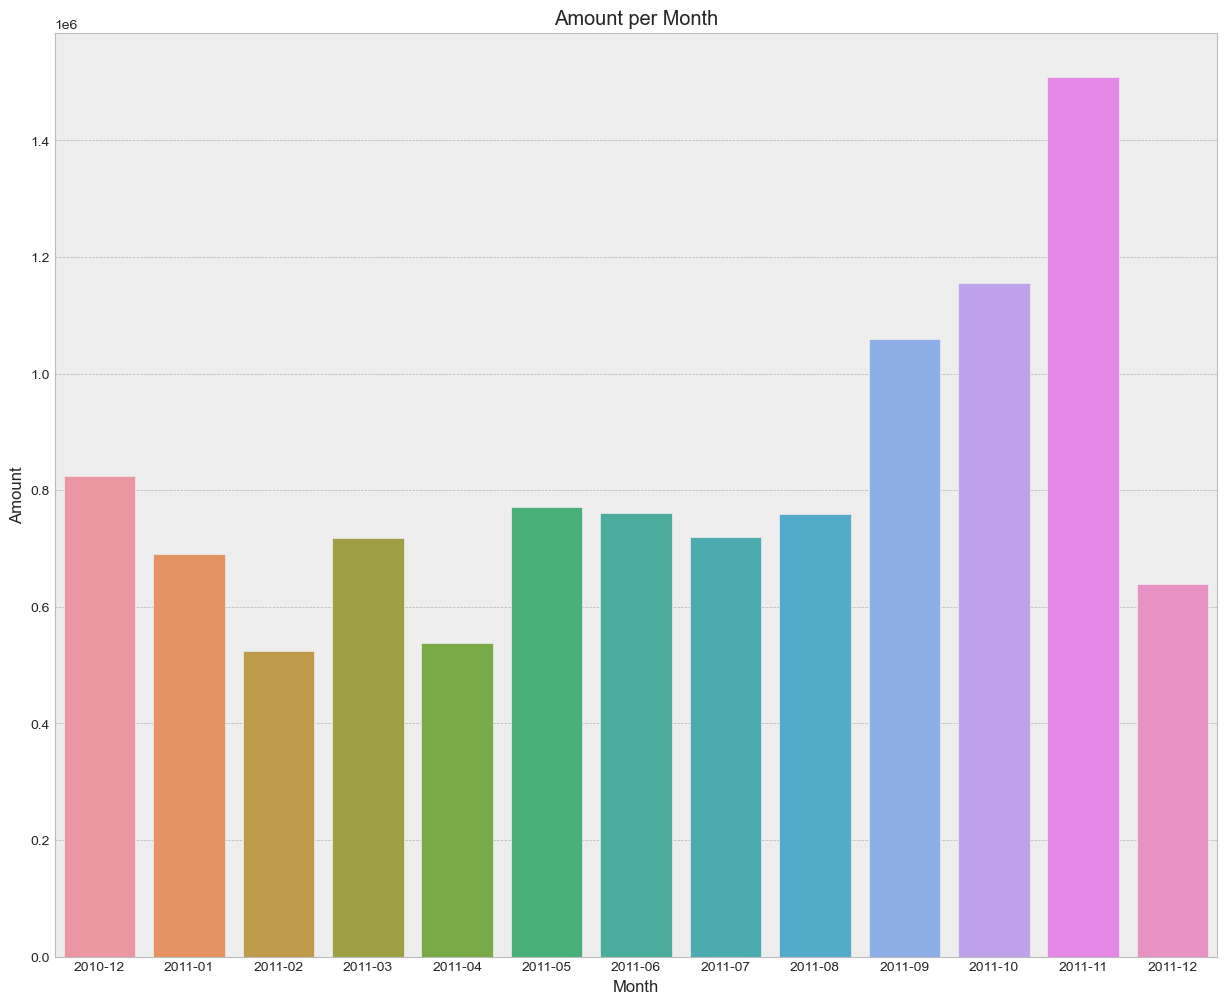

In [29]:
# Plot amount by year_month

sns.barplot(x='year_month', y='amount', data=df_new.groupby('year_month')['amount'].sum().reset_index())
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Amount per Month')
plt.show()

## Item Insight
1. Which item purchased by the greatest number of customer?
2. Which most sold item based on sum of sales?
3. Which most sold item by count of orders?
4. What are the "first choice" items for greatest number of invoices?

In [30]:
most_sold_item = df_new.pivot_table(index=['StockCode','Description'], values='Quantity', aggfunc='sum').sort_values(by='Quantity', ascending=False).reset_index()
most_sold_item.head()

,StockCode,Description,Quantity
0,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
1,23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
3,85099B,JUMBO BAG RED RETROSPOT,48474
4,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37599


In [31]:
most_bought = df_new.pivot_table(index=['StockCode','Description'], values='CustomerID', aggfunc= lambda x: len(x.unique())).sort_values(by='CustomerID', ascending=False).reset_index()
most_bought.head()

,StockCode,Description,CustomerID
0,22423,REGENCY CAKESTAND 3 TIER,882
1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,857
2,47566,PARTY BUNTING,709
3,84879,ASSORTED COLOUR BIRD ORNAMENT,679
4,22720,SET OF 3 CAKE TINS PANTRY DESIGN,641


In [32]:
len(most_bought)

4161

In [33]:
len(df_new[df_new['Description']== 'REGENCY CAKESTAND 3 TIER'].CustomerID.unique())

882

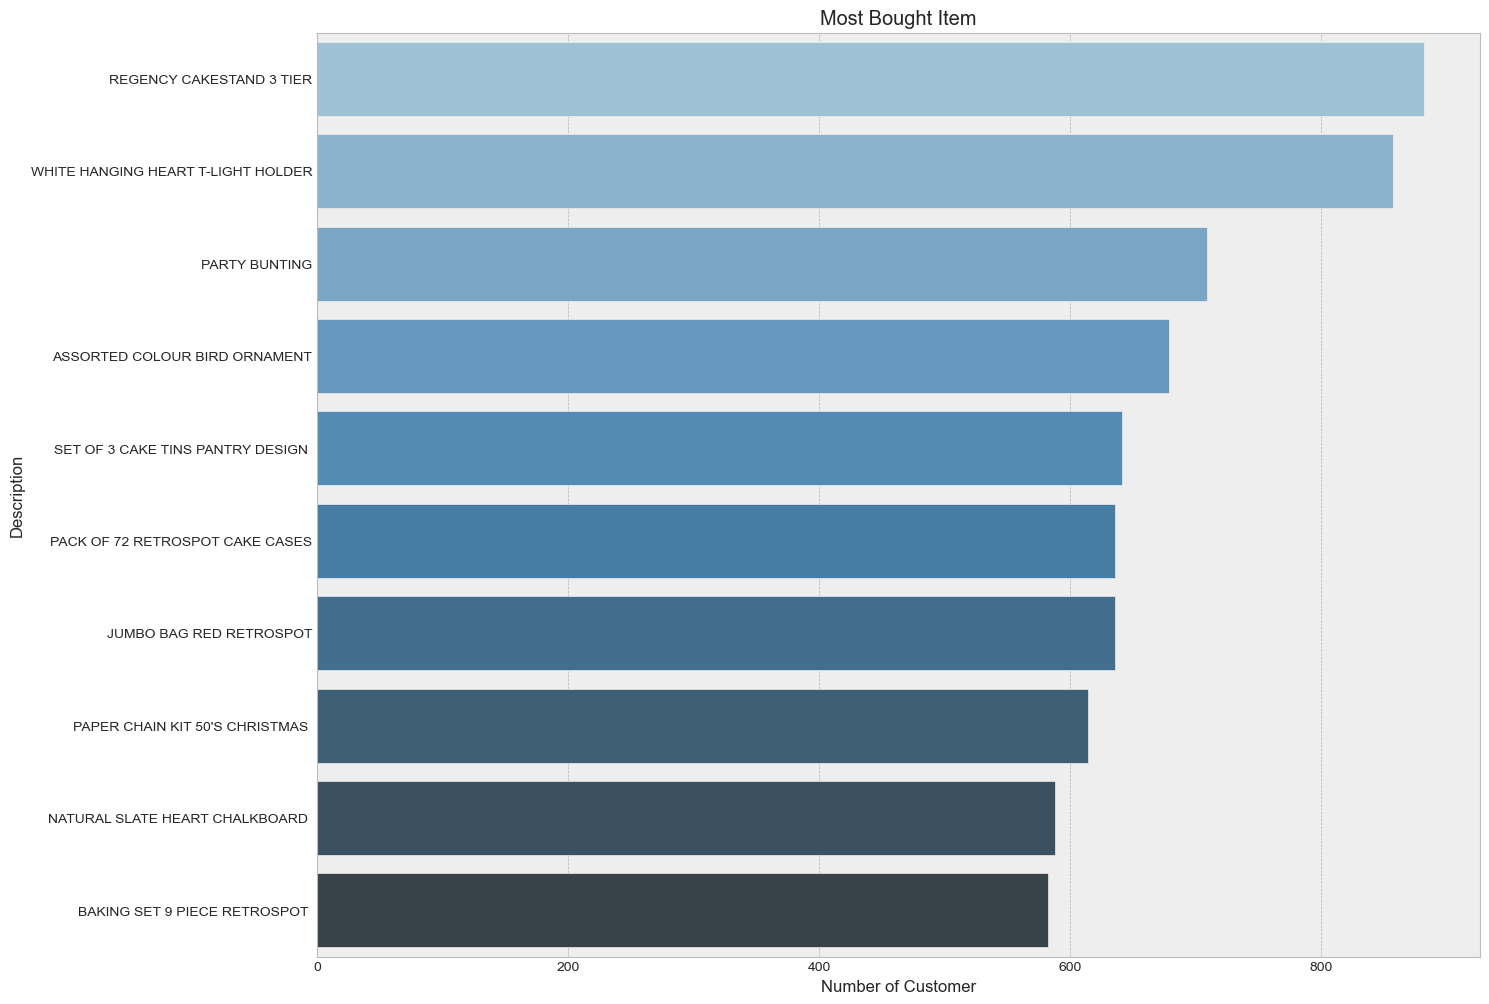

In [34]:
sns.barplot(x='CustomerID', y='Description', data=most_bought[:10], orient='h', palette='Blues_d')
plt.xlabel('Number of Customer')
plt.ylabel('Description')
plt.title('Most Bought Item')
plt.show()

In [35]:
df_new.Description = df_new.Description.str.replace(' ', '_')

In [36]:
from wordcloud import WordCloud, STOPWORDS

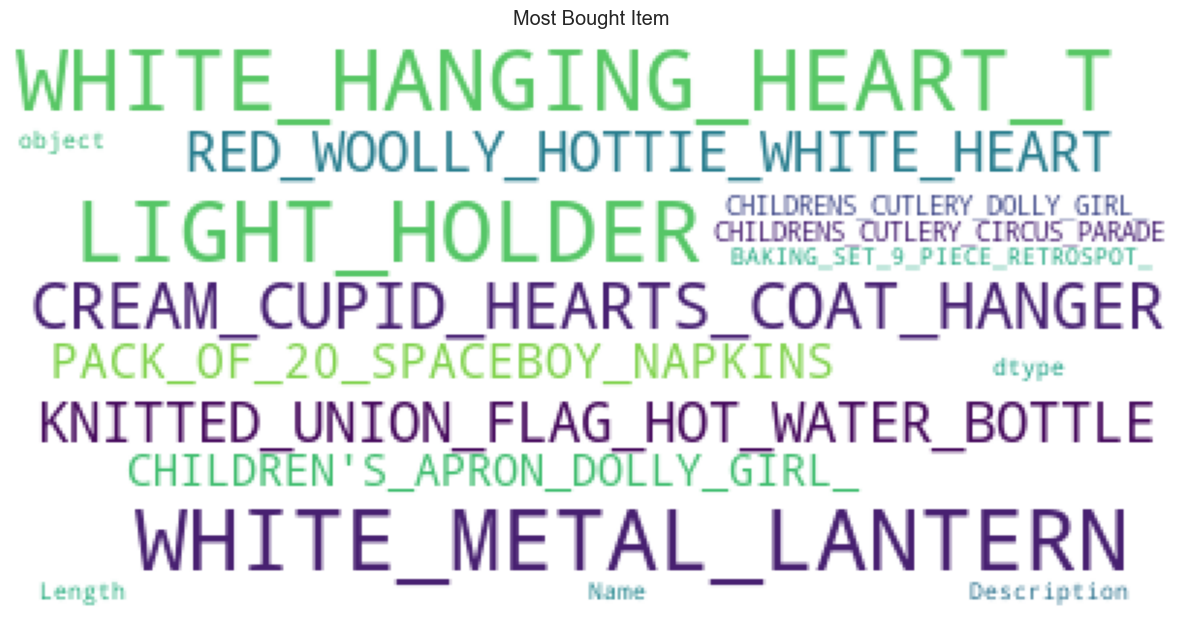

In [37]:
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, max_words=100, max_font_size=40, random_state=42).generate(str(df_new['Description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Bought Item')
plt.show()

## Top 10 First Choices

In [38]:
l = df_new.InvoiceNo.to_list()
len(l)

530104

In [39]:
invoice_list  = list(set(l))
len(invoice_list)

19960

In [40]:
# Sort data by customerID and InvoiceDate

df_new = df_new.sort_values(['CustomerID', 'InvoiceDate'])
df_new.head(10)

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
61619,541431,23166,2011-01,1,Tuesday,10,MEDIUM_CERAMIC_TOP_STORAGE_JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
14938,537626,85116,2010-12,12,Tuesday,14,BLACK_CANDELABRA_T-LIGHT_HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,25.2
14939,537626,22375,2010-12,12,Tuesday,14,AIRLINE_BAG_VINTAGE_JET_SET_BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,17.0
14940,537626,71477,2010-12,12,Tuesday,14,COLOUR_GLASS._STAR_T-LIGHT_HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,39.0
14941,537626,22492,2010-12,12,Tuesday,14,MINI_PAINT_SET_VINTAGE_,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,23.4
14942,537626,22771,2010-12,12,Tuesday,14,CLEAR_DRAWER_KNOB_ACRYLIC_EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,15.0
14943,537626,22772,2010-12,12,Tuesday,14,PINK_DRAWER_KNOB_ACRYLIC_EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,15.0
14944,537626,22773,2010-12,12,Tuesday,14,GREEN_DRAWER_KNOB_ACRYLIC_EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,15.0
14945,537626,22774,2010-12,12,Tuesday,14,RED_DRAWER_KNOB_ACRYLIC_EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,15.0
14946,537626,22775,2010-12,12,Tuesday,14,PURPLE_DRAWERKNOB_ACRYLIC_EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,15.0


In [41]:
# Create a dataframe that contains each invoice and its first item based on

df_first_item = df_new.groupby('InvoiceNo').first().reset_index()
df_first_item.head()

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,2010-12,12,Wednesday,8,WHITE_HANGING_HEART_T-LIGHT_HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536366,22633,2010-12,12,Wednesday,8,HAND_WARMER_UNION_JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
2,536367,84879,2010-12,12,Wednesday,8,ASSORTED_COLOUR_BIRD_ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08
3,536368,22960,2010-12,12,Wednesday,8,JAM_MAKING_SET_WITH_JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,25.50
4,536369,21756,2010-12,12,Wednesday,8,BATH_BUILDING_BLOCK_WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,17.85


In [42]:
len(df_first_item)

19960

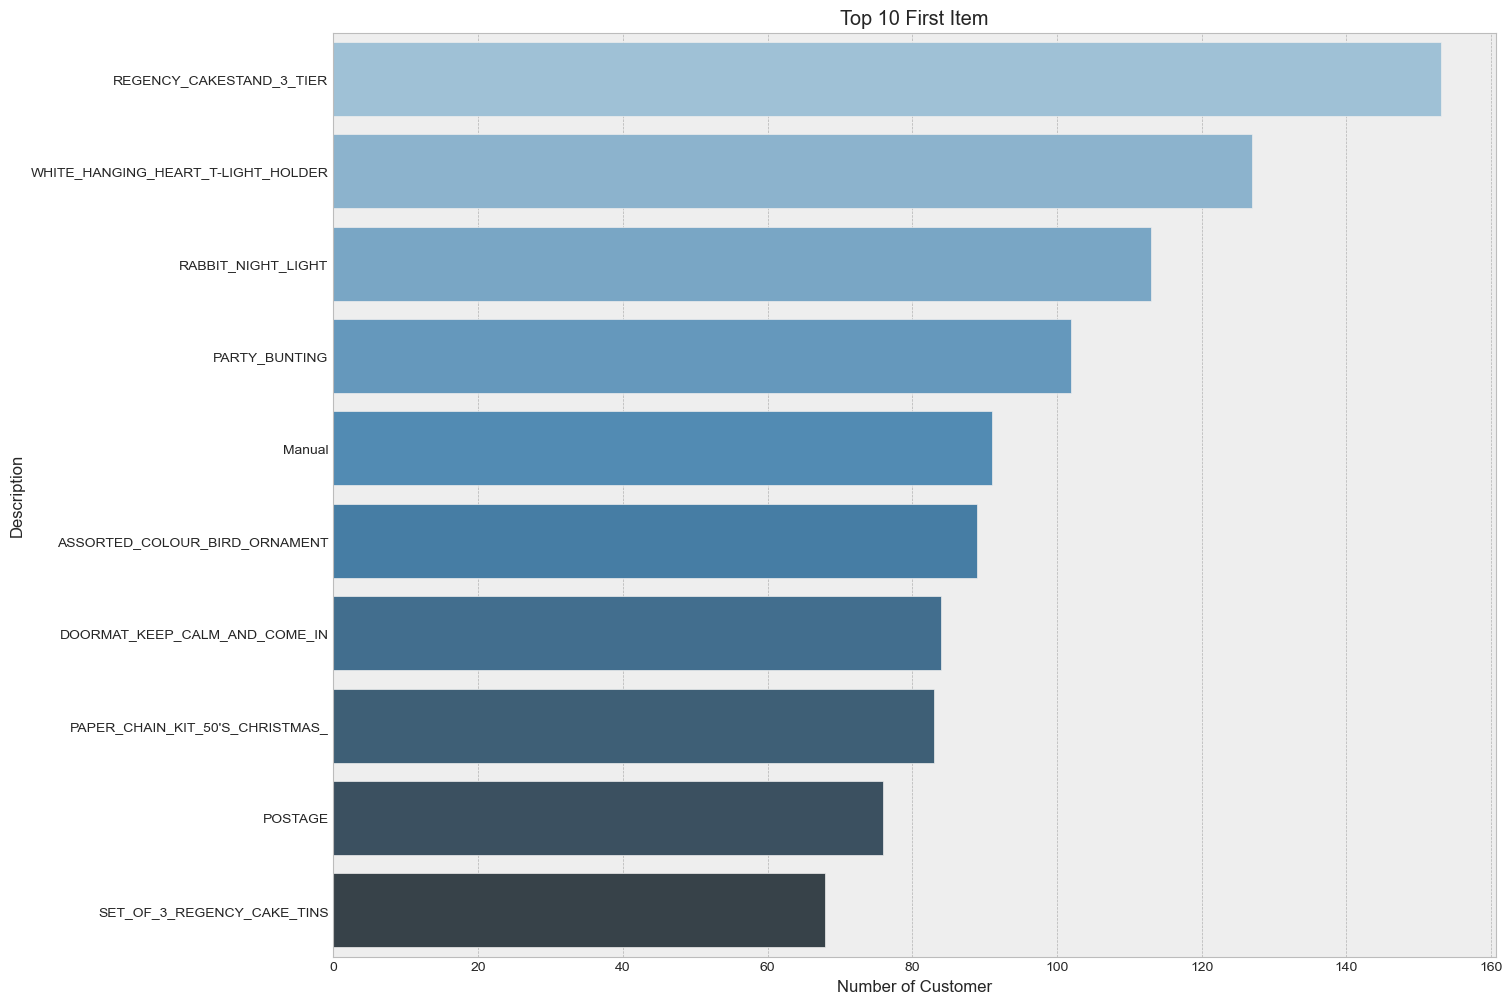

In [43]:
# Visualze top 10 first item

sns.barplot(x='CustomerID', y='Description', data=df_first_item.groupby('Description')['CustomerID'].nunique().reset_index().sort_values(by='CustomerID', ascending=False)[:10], orient='h', palette='Blues_d')
plt.xlabel('Number of Customer')
plt.ylabel('Description')
plt.title('Top 10 First Item')
plt.show()

## Frequently Bought Together
1. Which item frequently bought together?
2. If user buys item item X, which item he/she likely to buy next?

In [44]:
from mlxtend.frequent_patterns import apriori, association_rules

In [45]:
market_basket = df_new.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [46]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [59]:
market_basket_sets = market_basket.applymap(encode_units)

In [60]:
market_basket_sets.head()

Description,*Boombox_Ipod_Classic,*USB_Office_Mirror_Ball,10_COLOUR_SPACEBOY_PEN,12_COLOURED_PARTY_BALLOONS,12_DAISY_PEGS_IN_WOOD_BOX,12_EGG_HOUSE_PAINTED_WOOD,12_HANGING_EGGS_HAND_PAINTED,12_IVORY_ROSE_PEG_PLACE_SETTINGS,12_MESSAGE_CARDS_WITH_ENVELOPES,12_PENCILS_SMALL_TUBE_RED_RETROSPOT,...,_DOLLY_GIRL_BEAKER,_I_LOVE_LONDON_MINI_BACKPACK,_I_LOVE_LONDON_MINI_RUCKSACK,_NINE_DRAWER_OFFICE_TIDY,_OVAL_WALL_MIRROR_DIAMANTE_,_RED_SPOT_GIFT_BAG_LARGE,_SET_2_TEA_TOWELS_I_LOVE_LONDON_,_SPACEBOY_BABY_GIFT_SET,_TOADSTOOL_BEDSIDE_LIGHT_,_TRELLIS_COAT_RACK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# see column that start with W

market_basket_sets.columns[market_basket_sets.columns.str.startswith('WO')]

Index(['WOODEN_ADVENT_CALENDAR_CREAM', 'WOODEN_ADVENT_CALENDAR_RED',
       'WOODEN_BOX_ADVENT_CALENDAR_', 'WOODEN_BOX_OF_DOMINOES',
       'WOODEN_CROQUET_GARDEN_SET', 'WOODEN_FRAME_ANTIQUE_WHITE_',
       'WOODEN_HAPPY_BIRTHDAY_GARLAND', 'WOODEN_HEART_CHRISTMAS_SCANDINAVIAN',
       'WOODEN_OWLS_LIGHT_GARLAND_', 'WOODEN_PICTURE_FRAME_WHITE_FINISH',
       'WOODEN_REGATTA_BUNTING', 'WOODEN_ROUNDERS_GARDEN_SET_',
       'WOODEN_SCHOOL_COLOURING_SET', 'WOODEN_SKITTLES_GARDEN_SET',
       'WOODEN_STAR_CHRISTMAS_SCANDINAVIAN',
       'WOODEN_TREE_CHRISTMAS_SCANDINAVIAN', 'WOODEN_UNION_JACK_BUNTING',
       'WOODLAND_BUNNIES_LOLLY_MAKERS', 'WOODLAND_CHARLOTTE_BAG',
       'WOODLAND_DESIGN__COTTON_TOTE_BAG', 'WOODLAND_LARGE_BLUE_FELT_HEART',
       'WOODLAND_LARGE_PINK_FELT_HEART', 'WOODLAND_LARGE_RED_FELT_HEART',
       'WOODLAND_MINI_BACKPACK', 'WOODLAND_MINI_RUCKSACK_',
       'WOODLAND_PARTY_BAG_+_STICKER_SET', 'WOODLAND_SMALL_BLUE_FELT_HEART',
       'WOODLAND_SMALL_PINK_FELT_HEART', '

In [62]:
# Let's say I want to emphasize on product wooden start

wooden_start = market_basket_sets.loc[market_basket_sets['WOODEN_STAR_CHRISTMAS_SCANDINAVIAN'] == 1]

In [63]:
wooden_start.head()

Description,*Boombox_Ipod_Classic,*USB_Office_Mirror_Ball,10_COLOUR_SPACEBOY_PEN,12_COLOURED_PARTY_BALLOONS,12_DAISY_PEGS_IN_WOOD_BOX,12_EGG_HOUSE_PAINTED_WOOD,12_HANGING_EGGS_HAND_PAINTED,12_IVORY_ROSE_PEG_PLACE_SETTINGS,12_MESSAGE_CARDS_WITH_ENVELOPES,12_PENCILS_SMALL_TUBE_RED_RETROSPOT,...,_DOLLY_GIRL_BEAKER,_I_LOVE_LONDON_MINI_BACKPACK,_I_LOVE_LONDON_MINI_RUCKSACK,_NINE_DRAWER_OFFICE_TIDY,_OVAL_WALL_MIRROR_DIAMANTE_,_RED_SPOT_GIFT_BAG_LARGE,_SET_2_TEA_TOWELS_I_LOVE_LONDON_,_SPACEBOY_BABY_GIFT_SET,_TOADSTOOL_BEDSIDE_LIGHT_,_TRELLIS_COAT_RACK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536643,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536876,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
536987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
wooden_start.shape[0]

512

In [66]:
# Filter only transaction that item bought is more than 1

wooden_start_new = wooden_start[wooden_start.sum(axis=1) > 1]


In [67]:
# Associsation rule

frequent_itemsets = apriori(wooden_start_new, min_support=0.15, use_colnames=True)
frequent_itemsets

/Users/cindybtari/opt/anaconda3/envs/recommender/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.160470,(12_PENCIL_SMALL_TUBE_WOODLAND)
1,0.166341,(3_RAFFIA_RIBBONS_50'S_CHRISTMAS_)
2,0.156556,(4_TRADITIONAL_SPINNING_TOPS)
3,0.195695,(60_CAKE_CASES_VINTAGE_CHRISTMAS)
4,0.150685,(6_GIFT_TAGS_VINTAGE_CHRISTMAS_)
...,...,...
284,0.209393,"(WOOD_STOCKING_CHRISTMAS_SCANDISPOT, WOODEN_HE..."
285,0.160470,"(ZINC_FOLKART_SLEIGH_BELLS, WOODEN_HEART_CHRIS..."
286,0.164384,"(WOODEN_TREE_CHRISTMAS_SCANDINAVIAN, WOOD_STOC..."
287,0.168297,"(PAPER_CHAIN_KIT_VINTAGE_CHRISTMAS, PAPER_CHAI..."


In [68]:
prod_rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
prod_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(12_PENCIL_SMALL_TUBE_WOODLAND),(WOODEN_STAR_CHRISTMAS_SCANDINAVIAN),0.160470,1.000000,0.160470,1.000000,1.000000,0.000000,inf
1,(WOODEN_STAR_CHRISTMAS_SCANDINAVIAN),(12_PENCIL_SMALL_TUBE_WOODLAND),1.000000,0.160470,0.160470,0.160470,1.000000,0.000000,1.000000
2,(3_RAFFIA_RIBBONS_50'S_CHRISTMAS_),(WOODEN_HEART_CHRISTMAS_SCANDINAVIAN),0.166341,0.759295,0.152642,0.917647,1.208551,0.026340,2.922840
3,(WOODEN_HEART_CHRISTMAS_SCANDINAVIAN),(3_RAFFIA_RIBBONS_50'S_CHRISTMAS_),0.759295,0.166341,0.152642,0.201031,1.208551,0.026340,1.043419
4,(3_RAFFIA_RIBBONS_50'S_CHRISTMAS_),(WOODEN_STAR_CHRISTMAS_SCANDINAVIAN),0.166341,1.000000,0.166341,1.000000,1.000000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
667,"(PAPER_CHAIN_KIT_50'S_CHRISTMAS_, WOODEN_HEART...","(WOODEN_TREE_CHRISTMAS_SCANDINAVIAN, WOODEN_ST...",0.270059,0.549902,0.174168,0.644928,1.172804,0.025662,1.267623
668,(WOODEN_TREE_CHRISTMAS_SCANDINAVIAN),"(PAPER_CHAIN_KIT_50'S_CHRISTMAS_, WOODEN_STAR_...",0.549902,0.270059,0.174168,0.316726,1.172804,0.025662,1.068299
669,(WOODEN_STAR_CHRISTMAS_SCANDINAVIAN),"(WOODEN_TREE_CHRISTMAS_SCANDINAVIAN, PAPER_CHA...",1.000000,0.174168,0.174168,0.174168,1.000000,0.000000,1.000000
670,(WOODEN_HEART_CHRISTMAS_SCANDINAVIAN),"(WOODEN_TREE_CHRISTMAS_SCANDINAVIAN, WOODEN_ST...",0.759295,0.197652,0.174168,0.229381,1.160534,0.024092,1.041174


In [69]:
prod_rules.sort_values(by=['lift', 'support'], ascending=False).reset_index(drop=True).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DOTCOM_POSTAGE),(SUKI__SHOULDER_BAG),0.174168,0.174168,0.16047,0.921348,5.289989,0.130135,10.499860
1,(SUKI__SHOULDER_BAG),(DOTCOM_POSTAGE),0.174168,0.174168,0.16047,0.921348,5.289989,0.130135,10.499860
2,"(DOTCOM_POSTAGE, WOODEN_STAR_CHRISTMAS_SCANDIN...",(SUKI__SHOULDER_BAG),0.174168,0.174168,0.16047,0.921348,5.289989,0.130135,10.499860
3,"(WOODEN_STAR_CHRISTMAS_SCANDINAVIAN, SUKI__SHO...",(DOTCOM_POSTAGE),0.174168,0.174168,0.16047,0.921348,5.289989,0.130135,10.499860
4,(DOTCOM_POSTAGE),"(WOODEN_STAR_CHRISTMAS_SCANDINAVIAN, SUKI__SHO...",0.174168,0.174168,0.16047,0.921348,5.289989,0.130135,10.499860
5,(SUKI__SHOULDER_BAG),"(DOTCOM_POSTAGE, WOODEN_STAR_CHRISTMAS_SCANDIN...",0.174168,0.174168,0.16047,0.921348,5.289989,0.130135,10.499860
6,(JAM_MAKING_SET_PRINTED),(DOTCOM_POSTAGE),0.189824,0.174168,0.16047,0.845361,4.853701,0.127408,5.340378
7,(DOTCOM_POSTAGE),(JAM_MAKING_SET_PRINTED),0.174168,0.189824,0.16047,0.921348,4.853701,0.127408,10.300811
8,"(JAM_MAKING_SET_PRINTED, WOODEN_STAR_CHRISTMAS...",(DOTCOM_POSTAGE),0.189824,0.174168,0.16047,0.845361,4.853701,0.127408,5.340378
9,"(DOTCOM_POSTAGE, WOODEN_STAR_CHRISTMAS_SCANDIN...",(JAM_MAKING_SET_PRINTED),0.174168,0.189824,0.16047,0.921348,4.853701,0.127408,10.300811


In [76]:
def bought_together(item):
    df_item = market_basket_sets.loc[market_basket_sets[item] == 1]
    df_item = df_item[df_item.sum(axis=1) > 1]
    frequent_itemsets = apriori(df_item, min_support=0.15, use_colnames=True)
    prod_rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
    prod_rules.sort_values(by=['lift', 'support'], ascending=False).reset_index(drop=True)
    print('Items that bought together with {0}'.format(item))
    return prod_rules['consequents'].unique()[:5]

In [79]:
bought_together('WOODEN_STAR_CHRISTMAS_SCANDINAVIAN')

Items that bought together with WOODEN_STAR_CHRISTMAS_SCANDINAVIAN


array([frozenset({'WOODEN_STAR_CHRISTMAS_SCANDINAVIAN'}),
       frozenset({'12_PENCIL_SMALL_TUBE_WOODLAND'}),
       frozenset({'WOODEN_HEART_CHRISTMAS_SCANDINAVIAN'}),
       frozenset({"3_RAFFIA_RIBBONS_50'S_CHRISTMAS_"}),
       frozenset({'4_TRADITIONAL_SPINNING_TOPS'})], dtype=object)

In [89]:
pd.DataFrame(df_new[df_new['InvoiceNo'] == '536876'].Description.unique()).sort_values(by=0)

,0
102,10_COLOUR_SPACEBOY_PEN
234,12_MESSAGE_CARDS_WITH_ENVELOPES
444,12_PENCILS_SMALL_TUBE_RED_RETROSPOT
443,12_PENCILS_SMALL_TUBE_SKULL
445,12_PENCILS_TALL_TUBE_WOODLAND
...,...
265,WOVEN_BERRIES_CUSHION_COVER_
369,YELLOW_SHARK_HELICOPTER
328,ZINC_FINISH_15CM_PLANTER_POTS
435,ZINC_HEART_LATTICE_T-LIGHT_HOLDER


## Visualization Association Rule

In [90]:
support = prod_rules['support'].values
confidence = prod_rules['confidence'].values

In [92]:
import networkx as nx
import random

In [93]:
for i in range(len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10)-5)
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10)-5)

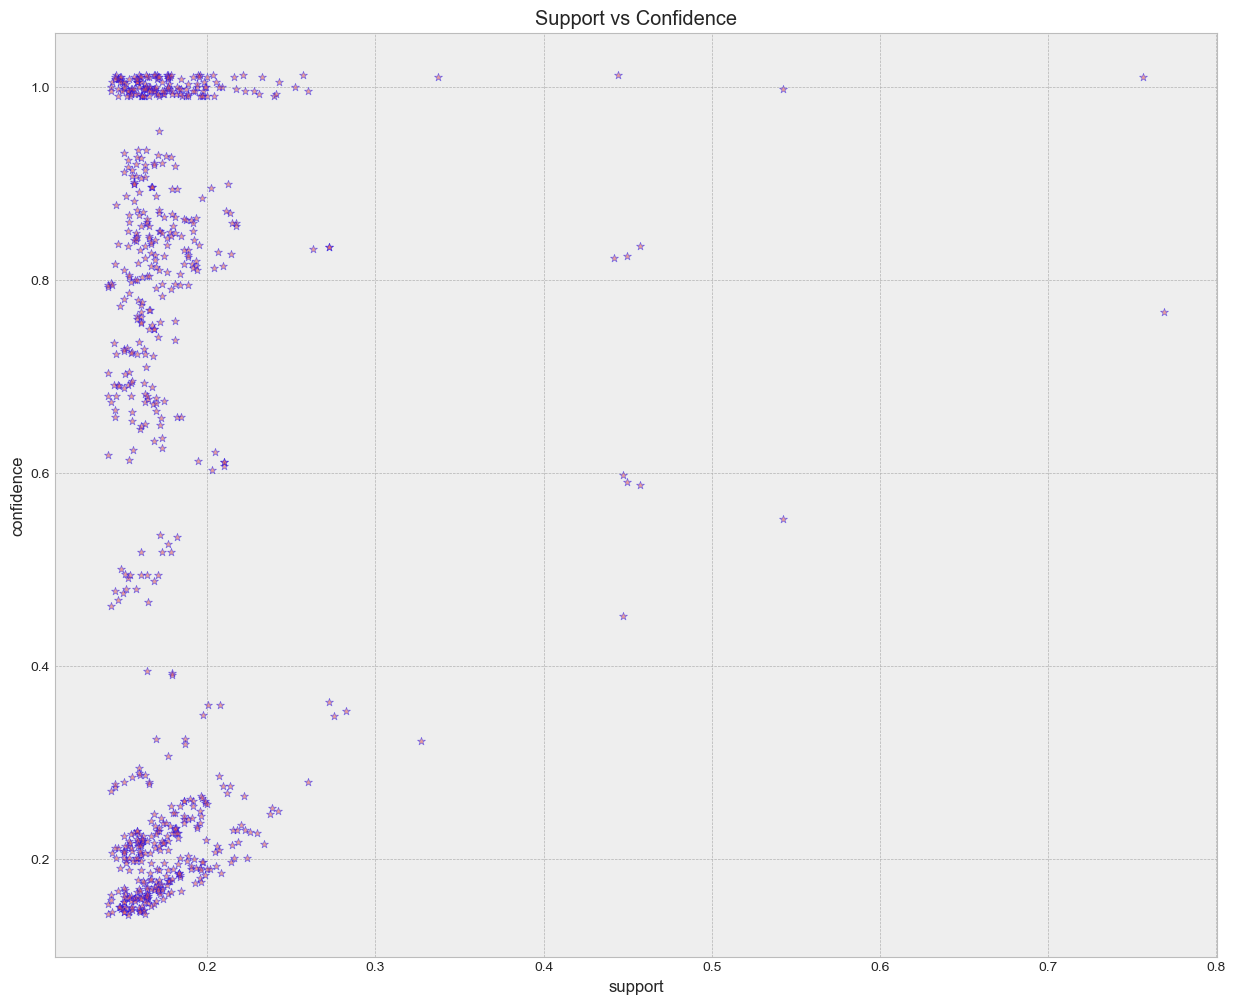

In [95]:
plt.scatter(support, confidence, alpha=0.5, marker='*', edgecolors='b')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [120]:
def graphing_wooden_start(wooden_start_rules, num_rules):
    Graph = nx.DiGraph()
    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']
    # adding as many nodes as number of rules required
    for i in range(num_rules):
        Graph.add_nodes_from(["R"+str(i)])
        # adding antecedents and consequents as nodes
    for a in wooden_start_rules['antecedents'][i]:
        Graph.add_nodes_from([a])
        Graph.add_edge(a, "R"+str(i), color=colors[i], weight = 2)
    for c in wooden_start_rules['consequents'][i]:
        Graph.add_nodes_from([c])
        Graph.add_edge("R"+str(i), c, color=colors[i],  weight=2)
    for node in Graph:
        found_a_string = False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('blue')
        else:
            color_map.append('yellow')
    #edges = Graph.edges(data = True)
    #labels = Graph.edges.data()
    #colors = [Graph[u][v]['color'] for u,v in labels]
    #weights = [Graph[u][v]['weight'] for u,v in labels]
    pos = nx.spring_layout(Graph, k=16, scale=1)
    nx.draw(Graph, pos, node_color=color_map, font_size=16, with_labels=False)
    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(Graph, pos)
    plt.show()

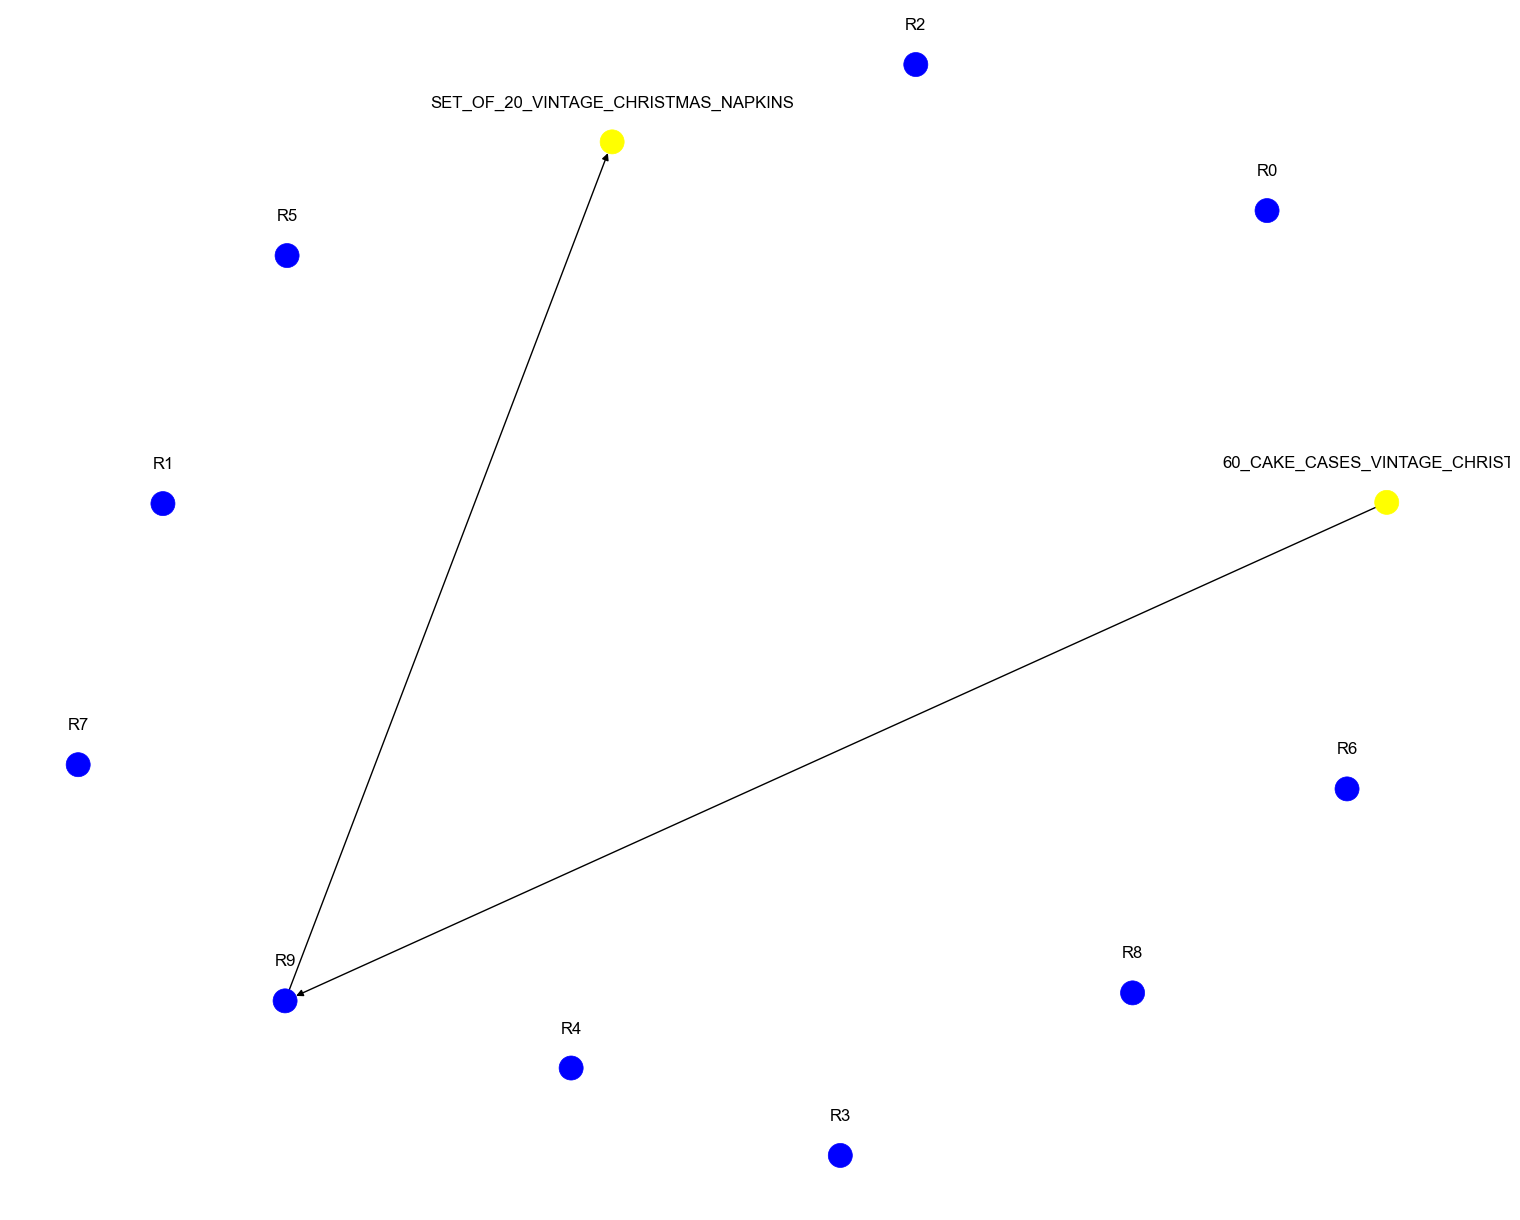

In [121]:
graphing_wooden_start(prod_rules, 10)

ValueError: Received invalid argument(s): edges

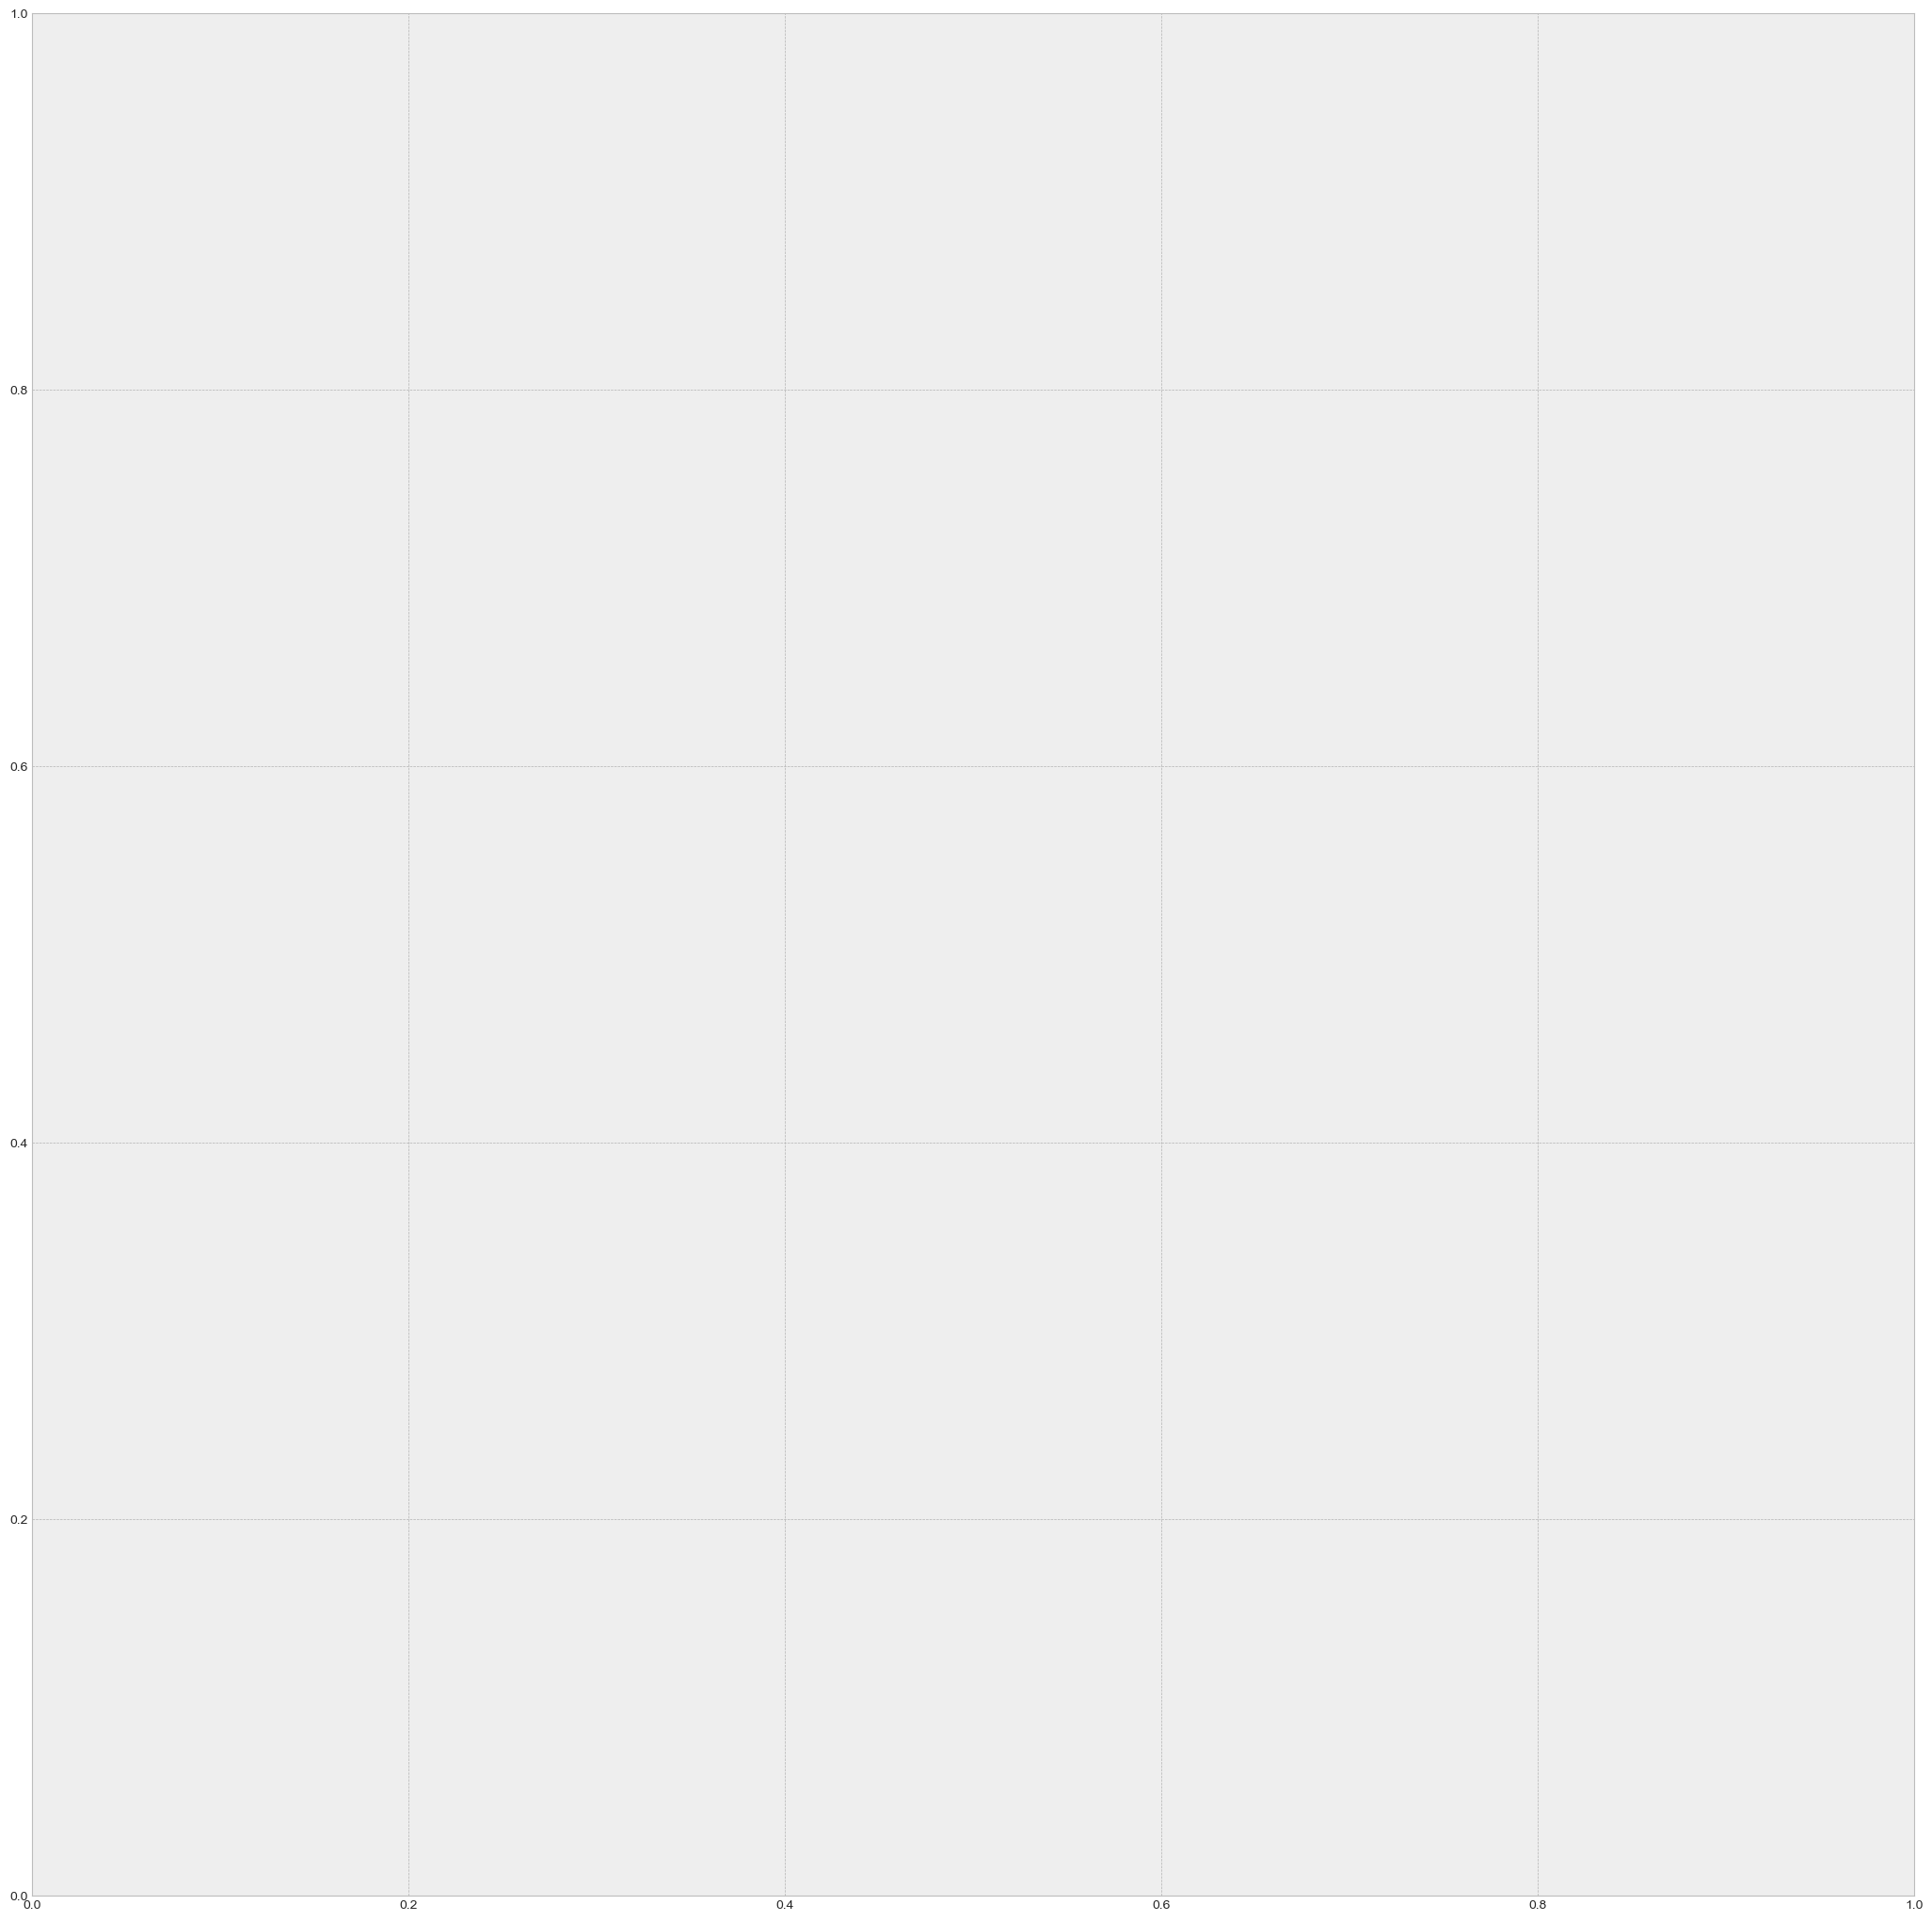

In [97]:
graphing_wooden_start(prod_rules, prod_rules.sort_values(by=['lift', 'support'], ascending=False).reset_index(drop=True).head(10))